# Global Power Plant Database

# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
# Reading the csv file from dataset
df = pd.read_csv("global_power.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 - So here we can see The dataset contains the details of Global Power Plant. this dataset is comprised of 908 rows and 25 columns including 2 target varibales  capacity_mw and primary_fuel(Fuel_Type) where we need to predict both capacity_mw and Fuel Type.

In [3]:
# Let's define primary_fuel as Fuel_Type to understand the dataset in better way
df.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


- Here 5 rows and 25 columns

# Exploratory Data Analysis(EDA)

In [5]:
# checking the dimension of dataset
df.shape

(908, 25)

- The dataset contains 908 rows and 25 columns.

In [6]:
# checking the type of dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_Type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

- So here we can see the dataset contains different features with different data types. Here there are two types of data namely object type and float64 data type . We will take care of the object datatype using  encoding techniques later.

In [7]:
# to get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   Fuel_Type                 908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

- From the above cell we get the information about the dataset which includes indexing type, column type, no-null values and memory usage . from this we can notice the presence of null-values.

In [8]:
# checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
Fuel_Type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

- from the above cell we can check the no. of unique values present in each columns.

 Here the columns country, country_long, other_fuel2, year_of_capacity_data and generation_data-source have only 1 unique value. Aslo other_fuel3, wepp_id, estimated_generation_gwh have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns.
    

In [9]:
# checking the count of the country
df["country"].value_counts()

IND    908
Name: country, dtype: int64

- There is only 1 country in th edataset wo we can drio this as it has nothing to do with our prediction also we can drop the column country_long on this basis

In [10]:
df.drop(columns=['country','country_long'],axis=1,inplace=True)

In [11]:
# dropping irrelavant columns
df.drop(columns=['other_fuel2','year_of_capacity_data','generation_data_source','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [12]:
# checking the count of name
df['name'].value_counts()

Rajgarh - NTPC Solar Power Plant    1
Nargund Wind Farm                   1
DNYANESHWAR MILL                    1
BUDGE BUDGE                         1
Singrauli Solar Power Plant         1
                                   ..
Enercon Babarzar Wind Farm          1
SERVALAR                            1
Rojhani Solar Power Plant           1
OBRA-A                              1
NAGOTHANE COMPLEX                   1
Name: name, Length: 908, dtype: int64

- Here we can observe that the name column has unique name  for each power plant so  dropping this column is good to go.

In [13]:
df.drop(['name'],axis=1,inplace=True)

In [14]:
# checking the count of gppd-idnr
df['gppd_idnr'].value_counts()

IND0000117    1
WRI1026768    1
IND0000186    1
IND0000137    1
IND0000420    1
             ..
WRI1026344    1
IND0000035    1
IND0000253    1
IND0000376    1
IND0000039    1
Name: gppd_idnr, Length: 908, dtype: int64

- The column gppd_idnr also contains the unique ID of the power plant, so we can drop this column as well.

In [15]:
df.drop('gppd_idnr',axis=1,inplace=True)

- The column Owner has more than 65% of null values also it may not important for prediction, so we can drop it 

In [16]:
df.drop('owner',axis=1,inplace=True)

- The column url also have no relation with the targets and  it has nothing to do with prediction so we can drop it as well.

In [17]:
df.drop('url',axis=1,inplace=True)

 - In the above cells we dropped the columns which are irrelavent and may not required for our prediction.

In [18]:
# checking the null values in the dataframe
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Fuel_Type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

- So here we can see there are huge missing values present in most of the columns. We will fill them using imputation techniques after checking skewness in these columns.

<AxesSubplot:>

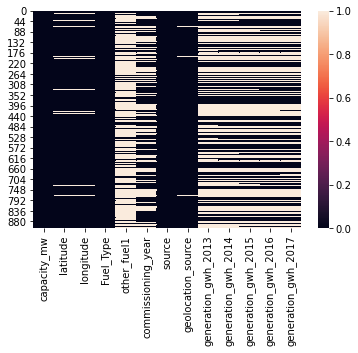

In [19]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

 - So here we can easily see the white lines in the heatmap which indicates the missing values in the dataset.

In [20]:
df.skew()

capacity_mw            3.193257
latitude              -0.143622
longitude              1.100942
commissioning_year    -1.056132
generation_gwh_2013    3.416338
generation_gwh_2014    3.357683
generation_gwh_2015    3.679016
generation_gwh_2016    3.524785
generation_gwh_2017    3.576849
dtype: float64

# Treating null values using imputation technique.

 Most of the columns have missing values except the target variables and the feature source.
    
- The columns latitude has numerical data and has no skewness and outliers so we can use mean method to fill the outliers

In [21]:
# let's check the mean of the latitude
df['latitude'].mean()       # we can replace the null values using this mean

21.196188863109057

In [22]:
# filling missing values in latitude using mean
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

 - The features other_fuel1 and geolocation_source have categorical data so we can fill the null values using mode method.

In [23]:
# let's check the mode of other_fuel1
df['other_fuel1'].mode()          # we can fill the null values using this code

0    Oil
dtype: object

In [24]:
# let's check the mode of geolocation_source column
df['geolocation_source'].mode()       # we can fill the null values using this mode

0    WRI
dtype: object

- So the modes of other_fuel1 and geolocation_source are Oil and WRI respectively which means they have more value counts in those columns .Let's fill the null values of categorical columns by their respective modes.

In [25]:
# Replacing the null value by its mode Oil
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [26]:
# filling null values by its mode WRI
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

 _ The columns longitude commissioning year, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh-2016 and generation_gwh_2017 are numerical type and have huge outliers and skewness so will replace missing values using median method

In [27]:
# filling null values using their median values
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())


In [28]:
# let's check the null values if there any
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
Fuel_Type              0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

 - Now we have removed all the null values using imputation method and the data is now clean. So we can move further. 

<AxesSubplot:>

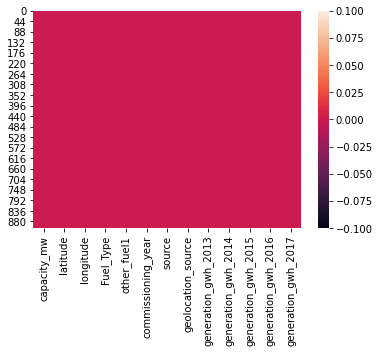

In [29]:
# let's visualize the null values clearly
sns.heatmap(df.isnull())

 - So it is clear that there are no missing values present in the dataset

In [30]:
# checking how many columns are there in the dataset
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

- These are the columns present in the dataset

In [31]:
# checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
31.2       1
105.7      1
63.2       1
49.6       1
2.5        1
Name: capacity_mw, Length: 365, dtype: int64

 - There are unique counts present in capacity_mw columns

In [32]:
# ckecking the list of counts of primary_fuel
df['Fuel_Type'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: Fuel_Type, dtype: int64

 - There are th list of the values in the column primary_fuel

In [33]:
# checking the uniqueness of primary_fuel
df['Fuel_Type'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

- There are the unique classes present in the primary_fuel columns.

In [34]:
# checking the list of counts of commissioning_year
df['commissioning_year'].value_counts()

2000.0    396
2013.0     28
2015.0     26
2012.0     23
2016.0     21
         ... 
1946.0      1
1949.0      1
1927.0      1
1937.0      1
1969.0      1
Name: commissioning_year, Length: 73, dtype: int64

- There are the counts of commissioning years of the power plants.

In [35]:
# let's extract power plant age from commissioning year by subtraction it from the year 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

- Here we have extracted Power plant age from commissioning  year and dropped commissioning year columns. From Power plant age we can get to know how old are the power plants. 

In [36]:
# let's check the data frame 
df.head()

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,797.063475,805.760000,701.02725,716.728350,807.601700,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,631.777928,617.789264,843.74700,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,3.0


In [37]:
# checking wheather the dataset contains any space
df.loc[df['capacity_mw']==" "]

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age


-  From the above cell it seems that there are no spaces in the dataset.

In [38]:
# Statistical summary of dataset
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.410936,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766,19.816079
std,580.221767,6.088110,4.783873,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626,13.085938
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,797.063475,805.760000,701.027250,716.728350,807.601700,15.000000
50%,60.000000,21.278850,76.719250,797.063475,805.760000,701.027250,716.728350,807.601700,18.000000
75%,388.125000,25.183775,79.211600,797.063475,805.760000,701.027250,716.728350,807.601700,21.000000
max,4760.000000,34.649000,95.408000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,91.000000


- Above cell  gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/invalid values present.

Observation :-
    
- The counts of columns are same which means there are no missing values present in the dataset.
- The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.
- The median is bit greate than the mean in the column latitude which means it is skewed to left.
- From the difference between maximum and 75% we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building  our model.
- The minimum capacity of the power plant is zero and maximum is 4760 and there is huge difference in mean and standard deviation.

So before visualizing the data, let's Separate categorical and numerical columns.

In [39]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']


-  So these are the categorical columns in the given dataset

In [40]:
# now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']


- In the above cell all the columns are numerical present in the dataset.

# Data Visualization


# Univariate  Analysis
Plotting categorical columns

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: Fuel_Type, dtype: int64


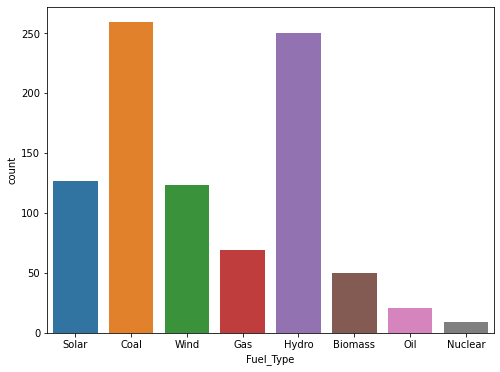

In [41]:
# Visualizing  the types of fuel in primary_fuel
print(df['Fuel_Type'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['Fuel_Type'])
plt.show()

- In the above cell the count plot shows the energy source used in primary electricity generation. 
Here using the source Coal(thermal) generates more electricity followed by Hydro(water) . 
Also the energy source Nuclear generates very less electricity compare to other.

-The Data is not balanced so will balance the data later.

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


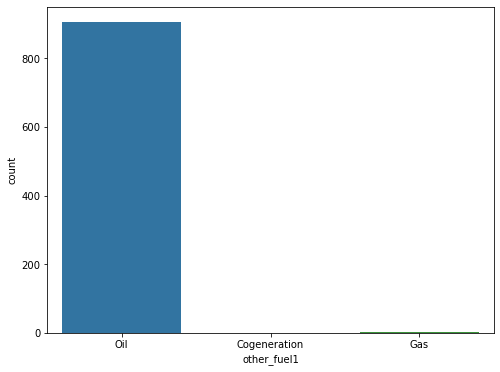

In [42]:
# visualizing the counts of other fuel
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['other_fuel1'])
plt.show()

- Here we can see there are 3 unique values in other_fuel1 and the count of oil is higher than cogeneration and gas.

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


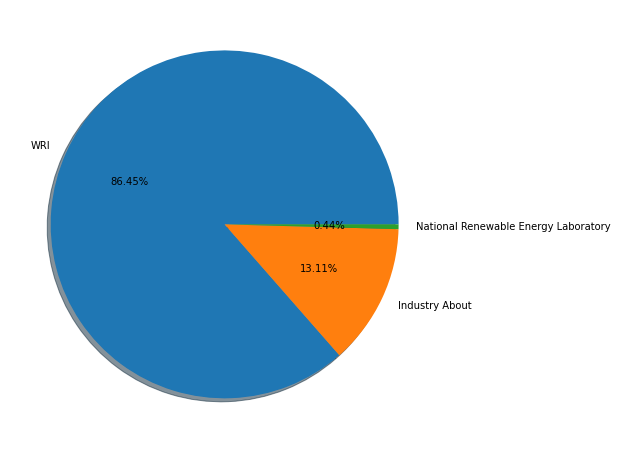

In [43]:
#Visualizing the counts of owner
print(df['geolocation_source'].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

- As in the above cell the plot shows that the geolocation source World Resources Institute(WRI)  has highest counts which means WRI gives the more geolocation information compare to other two sources.

# Distribution of skewness

Plotting Numerical Columns

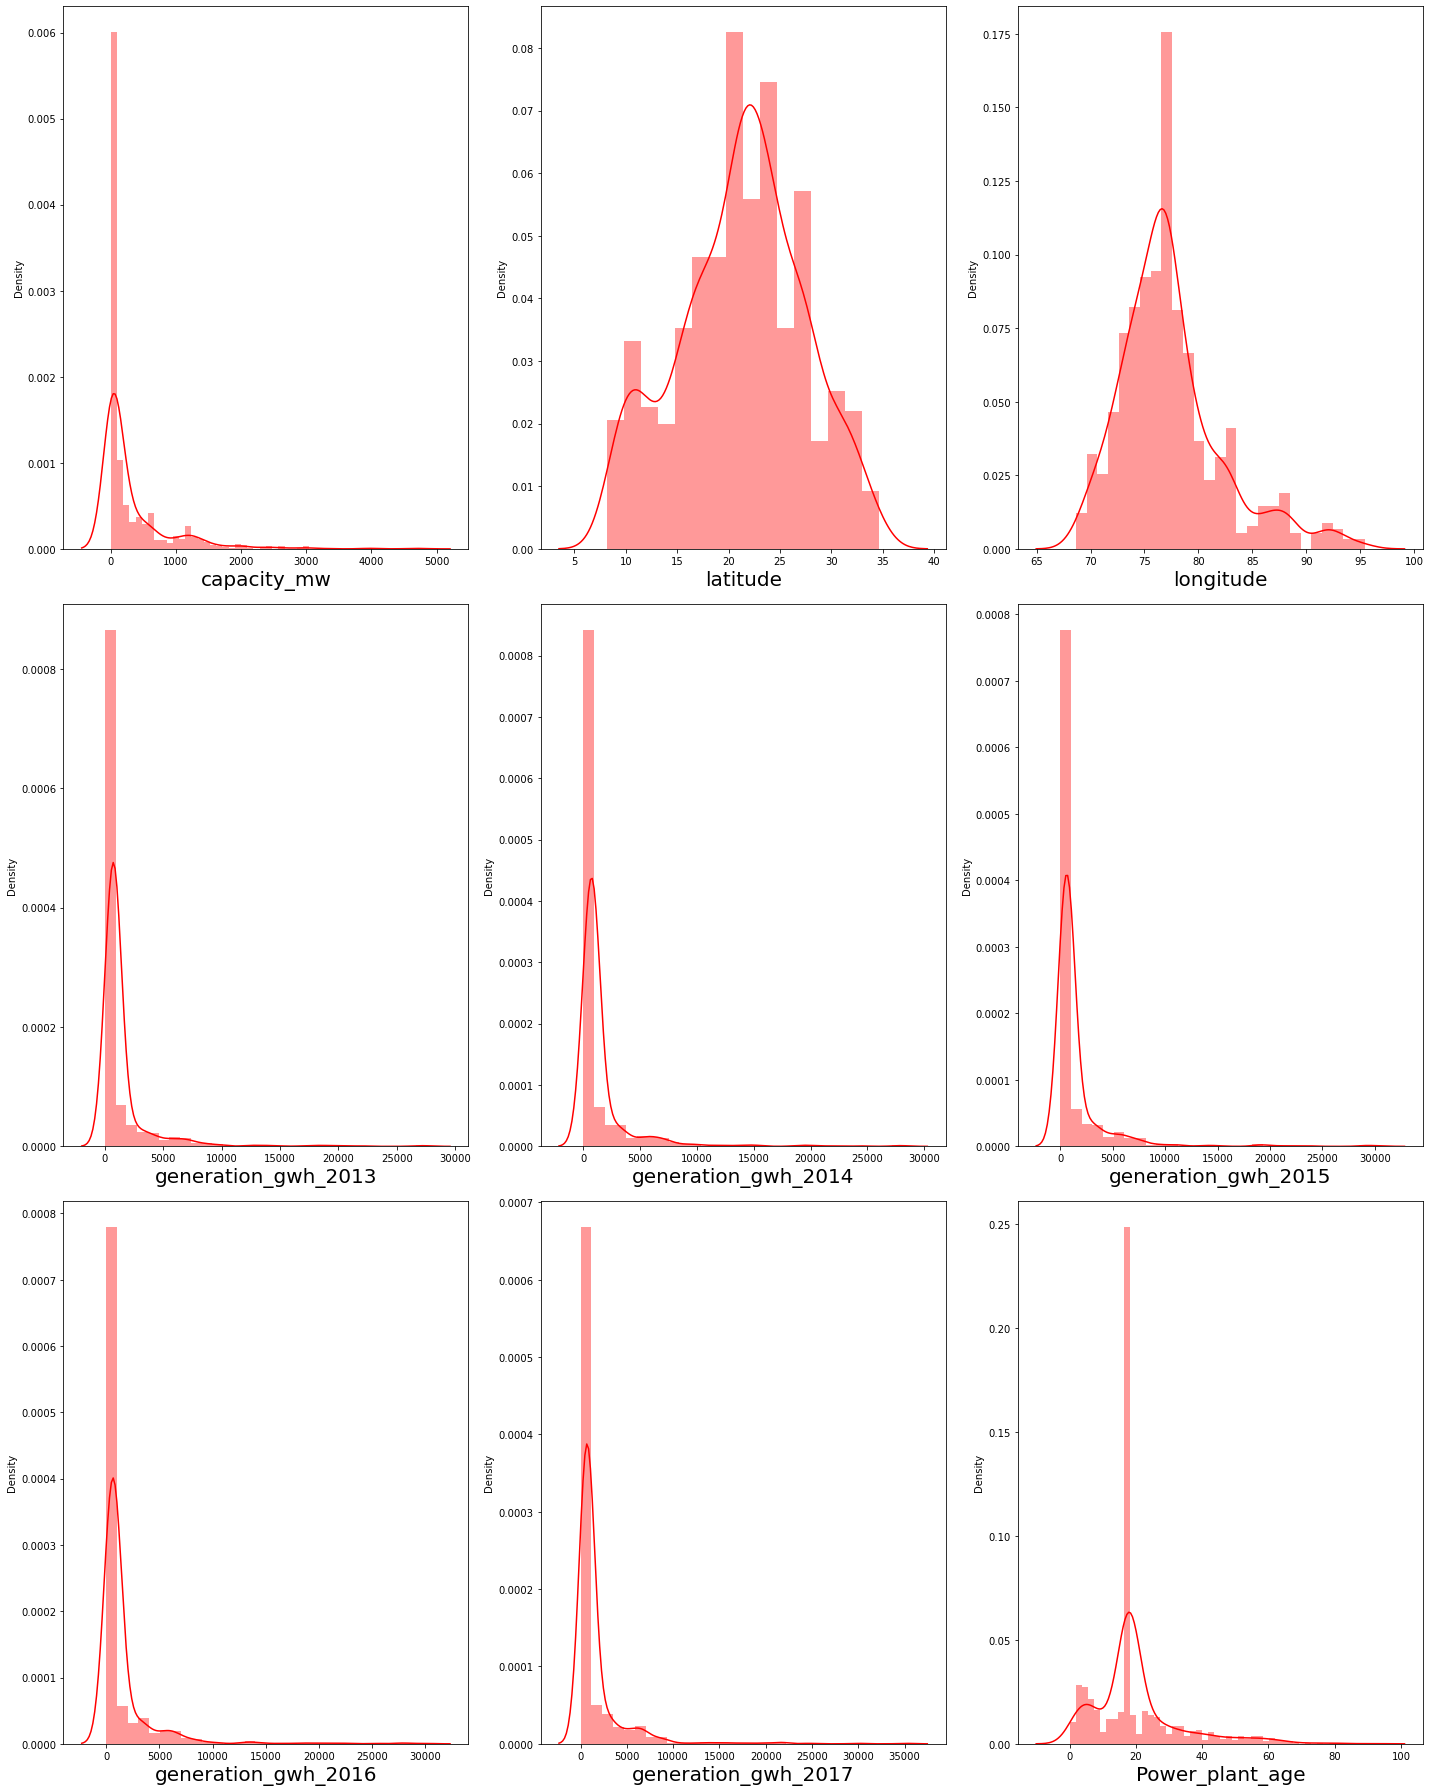

In [44]:
# checking how the data has been distributed in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Observation :- 
    
    - From the above distribution plots we can observe that the data is not normally distributed in all the columns except   latitude and longitude.
    - In most of the columns the mean is greater than the median which means they are skewed to right.
    - We will remove these skewness in all the coluns except the label in the later part.

# Comparing target varibale capacity_mw with features

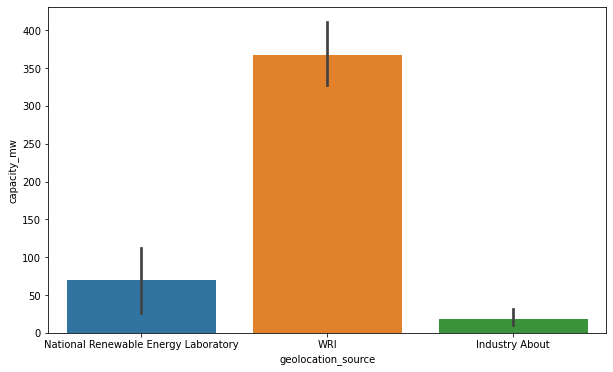

In [45]:
# let's check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data=df)
plt.show()

- The capacity of geolocation source WRI is maximum which has capacity more than 350 mega watts. The geolocation source industry about has less capacity

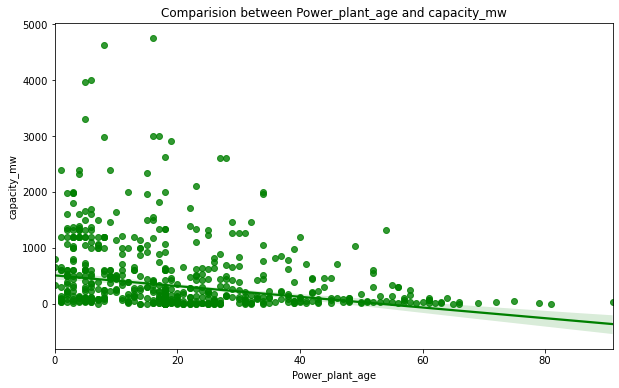

In [46]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = 'g');

- From the above plot we can observe that there is negative linear relationship between feature and label also we can infer that the capacity of older power plants is very less compared to the power plants which are started recently.

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

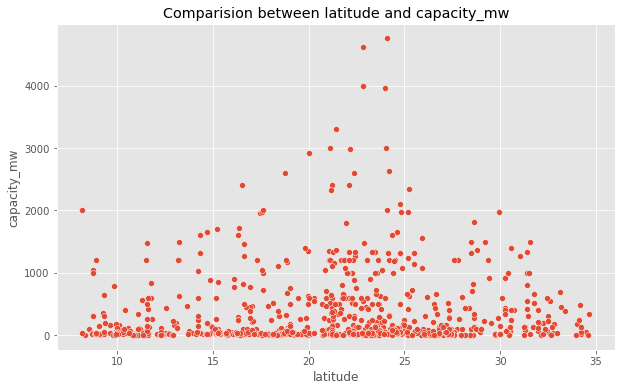

In [47]:
# let's check how the capacity is related to latitude  of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df['capacity_mw'])

- The plot shows that there is no linear relation between latitude and capacity of the power plant . We can notice the capacity of power plant is very less in this case also we can see some outliers present hear.

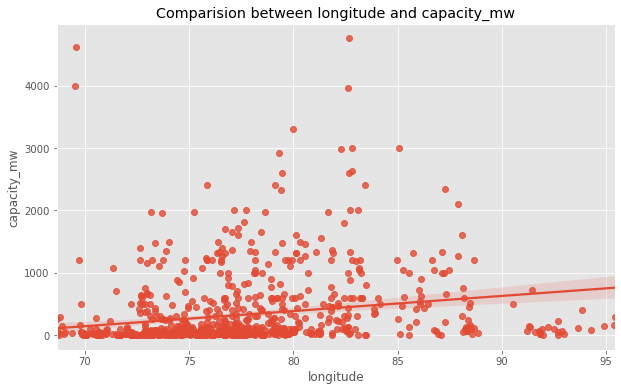

In [48]:
# let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df['capacity_mw']);

- There is very weak linear relation between longitude and capacity. Here the longitude ranges from 74-82 has more capacity upto 2000. And we can also observe the presence of outliers.

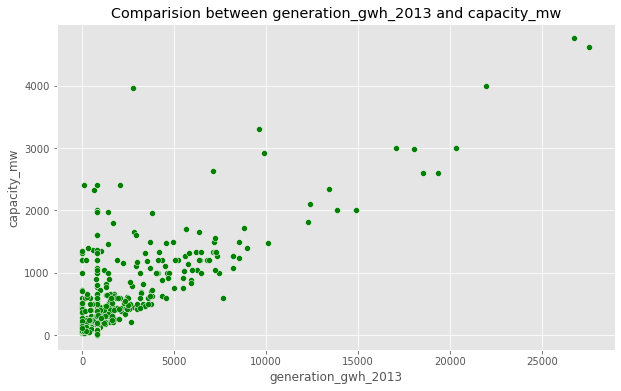

In [49]:
# let's check the capacity of the plant in generation_gwh_2013
plt.figure(figsize = (10,6))
plt.title('Comparision between generation_gwh_2013 and capacity_mw')
sns.scatterplot(x = 'generation_gwh_2013', y = 'capacity_mw', data = df,color='g')
plt.show()

- We can notice the linear relationship between the feature and the label. Here the electricity generation reported for the year 2013 has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

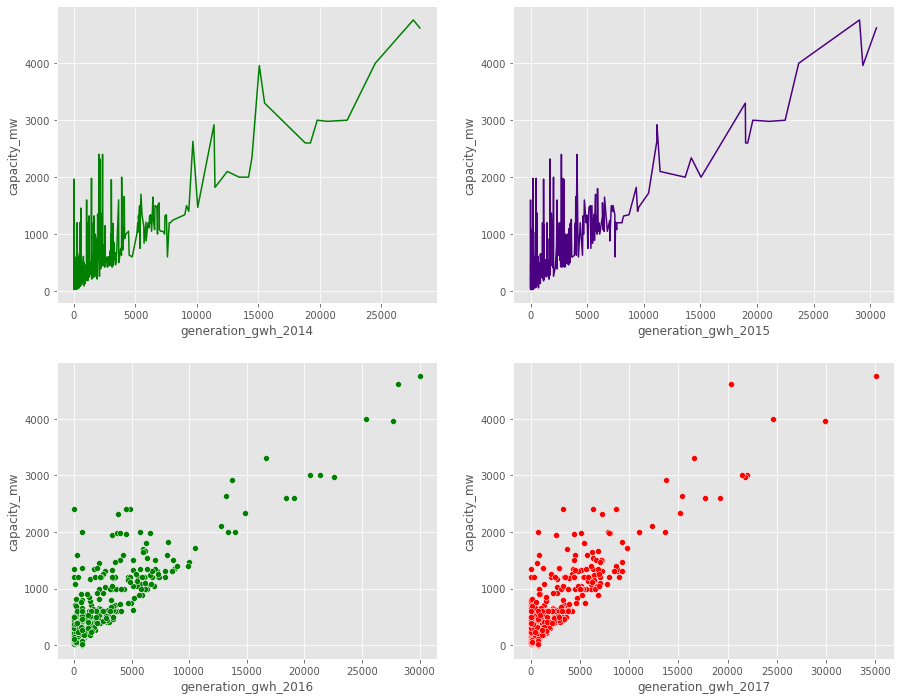

In [50]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# checking attrition level in Dailyrate
sns.lineplot(x='generation_gwh_2014', y='capacity_mw',ax=axes[0,0],data=df,color='g')

# checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2015', y='capacity_mw',ax=axes[0,1],data=df,color='indigo')

# checking attrition level in Monthlyrate
sns.scatterplot(x='generation_gwh_2016', y='capacity_mw',ax=axes[1,0],data=df,color='g')

# checking attrition level Monthlyincome
sns.scatterplot(x='generation_gwh_2017', y='capacity_mw',ax=axes[1,1],data=df,color='r')
plt.show()

Observation :- 
    
    - There is positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
    - The plot shows how the electricity generation reported for the years 2014 , 2015, 2016, 2017 have high capacity of above 1000mw . Also power generation growrh is more than 5000gwh in all the years.
    - As the electricity generation growth increases, the capacity of plant is also increasing moderately.

# Comparing the  target variable Fuel Types with other features

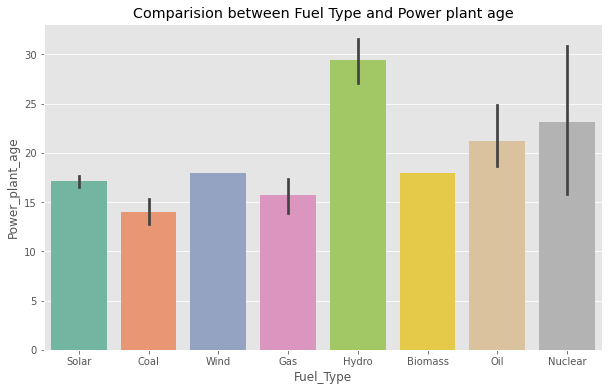

In [51]:
# Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and Power plant age")
sns.barplot(x='Fuel_Type',y='Power_plant_age', data=df,palette='Set2')
plt.show()

- From the above cell we can see most of the power plants uses Hydro(water) to generate the electricity followed by Nuclear and Oil.
- The power plants which are recently constructed uses Solar, Coal and Gas to gererate the power

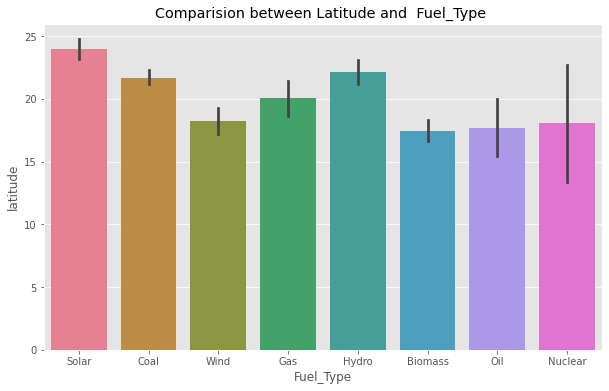

In [52]:
# Lets check how the fuel type is related to latitude of the power plant 
plt.figure(figsize = (10,6))
plt.title("Comparision between Latitude and  Fuel_Type ")
sns.barplot(df['Fuel_Type'],df['latitude'],palette='husl');

-  So here we can observe that the fuel type Solar has high latitude of above 20 followed by Hydro, Coal and Gas . Apart from these types others have less latitude.

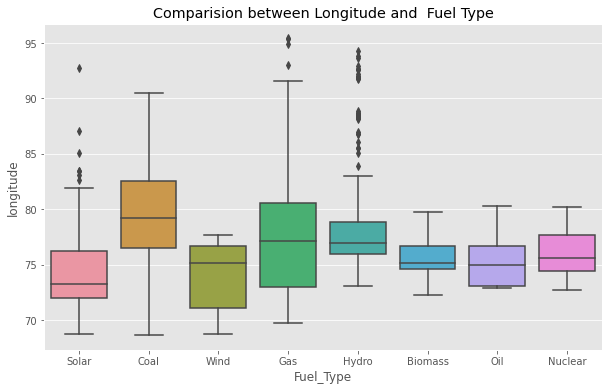

In [53]:
# Lets check how the fuel is related to longitude of the power plant 
plt.figure(figsize = [10,6])
plt.style.use('ggplot')
plt.title("Comparision between Longitude and  Fuel Type")
sns.boxplot(df['Fuel_Type'],df['longitude']);

- The fuel type Gas has high longitude followed by Hydro , Solar and Coal other fuel types have very less longitude.

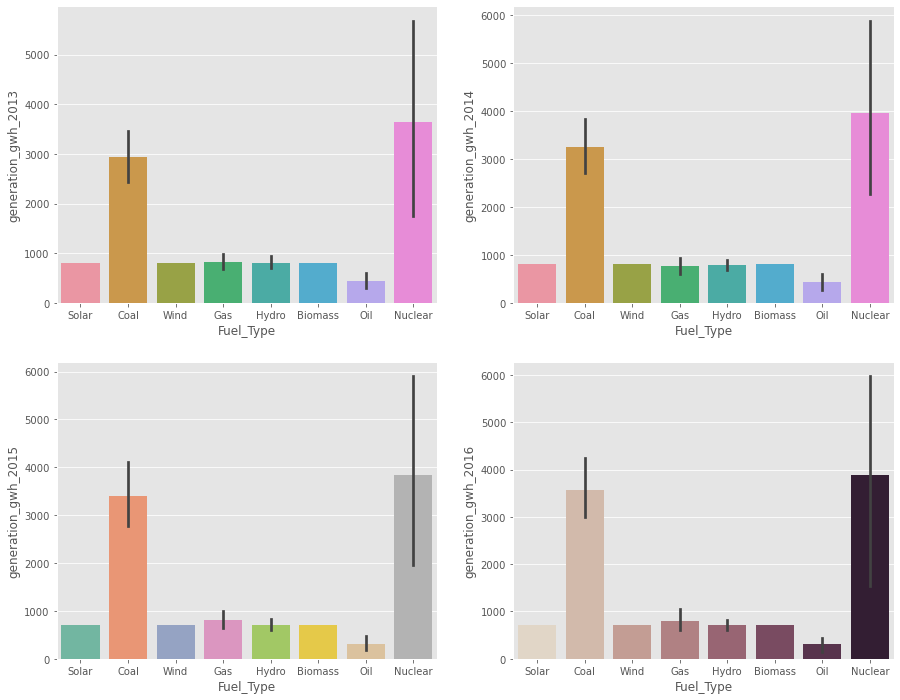

In [54]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

#checking attrition level in Dailyrate
sns.barplot(x='Fuel_Type',y='generation_gwh_2013',ax=axes[0,0],data=df)

# checking attrition level in hourlyrate
sns.barplot(x='Fuel_Type',y='generation_gwh_2014',ax=axes[0,1],data=df)

# checking attrition level in Monthlyrate
sns.barplot(x='Fuel_Type',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")

# checking attrition level Monthlyincome
sns.barplot(x='Fuel_Type',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

- From the graph we can notice the fuel type Nuclear has high electrical generation reports for all the years followed by Coal.
- Other fuel types have very less power generation reports.

# Checking the relation between targets

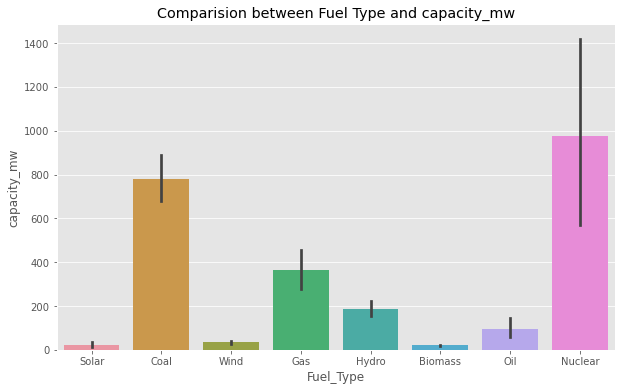

In [55]:
# let's check the relation between fuel type and capacity_mw
plt.figure(figsize=(10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x= 'Fuel_Type',y = 'capacity_mw',data = df)
plt.show()

- The plot shows that the capacity of generating electricity is high in Nuclear followed by Coal.
- Also the electricity generating capacity is very less in Solar, Biomass, Wind and other plants.

# Multivariate Analysis

Since we have 2 target variables capacity_mw and Fuel_Type, will check the pairwise relation for the features with both the targets separately.

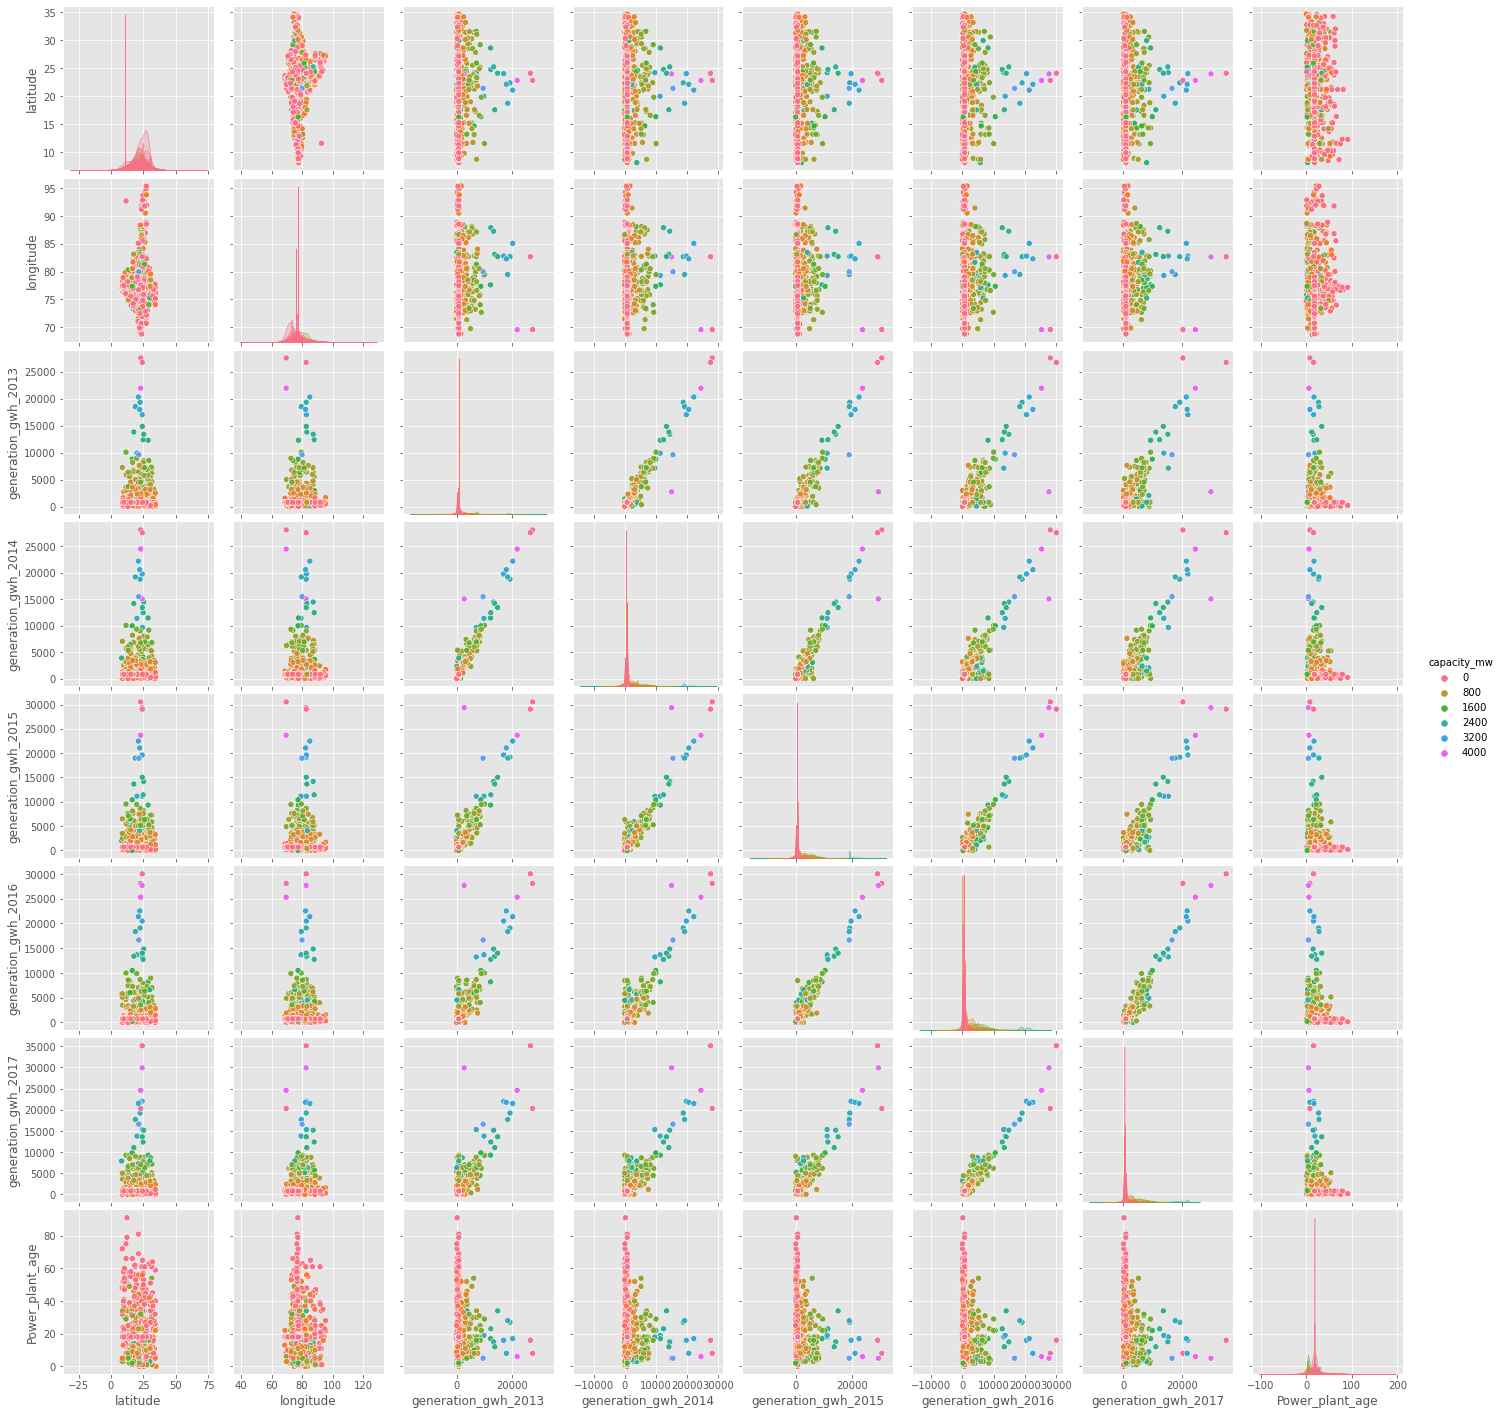

In [56]:
# checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df,hue='capacity_mw',palette='husl')

- This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'capacity_mw'. Here we can observe the relation between the features and label.
- Most of the features have strong linear relationship and correlation with each other.
- From the plot we can also observe the outliers in some of the columns .

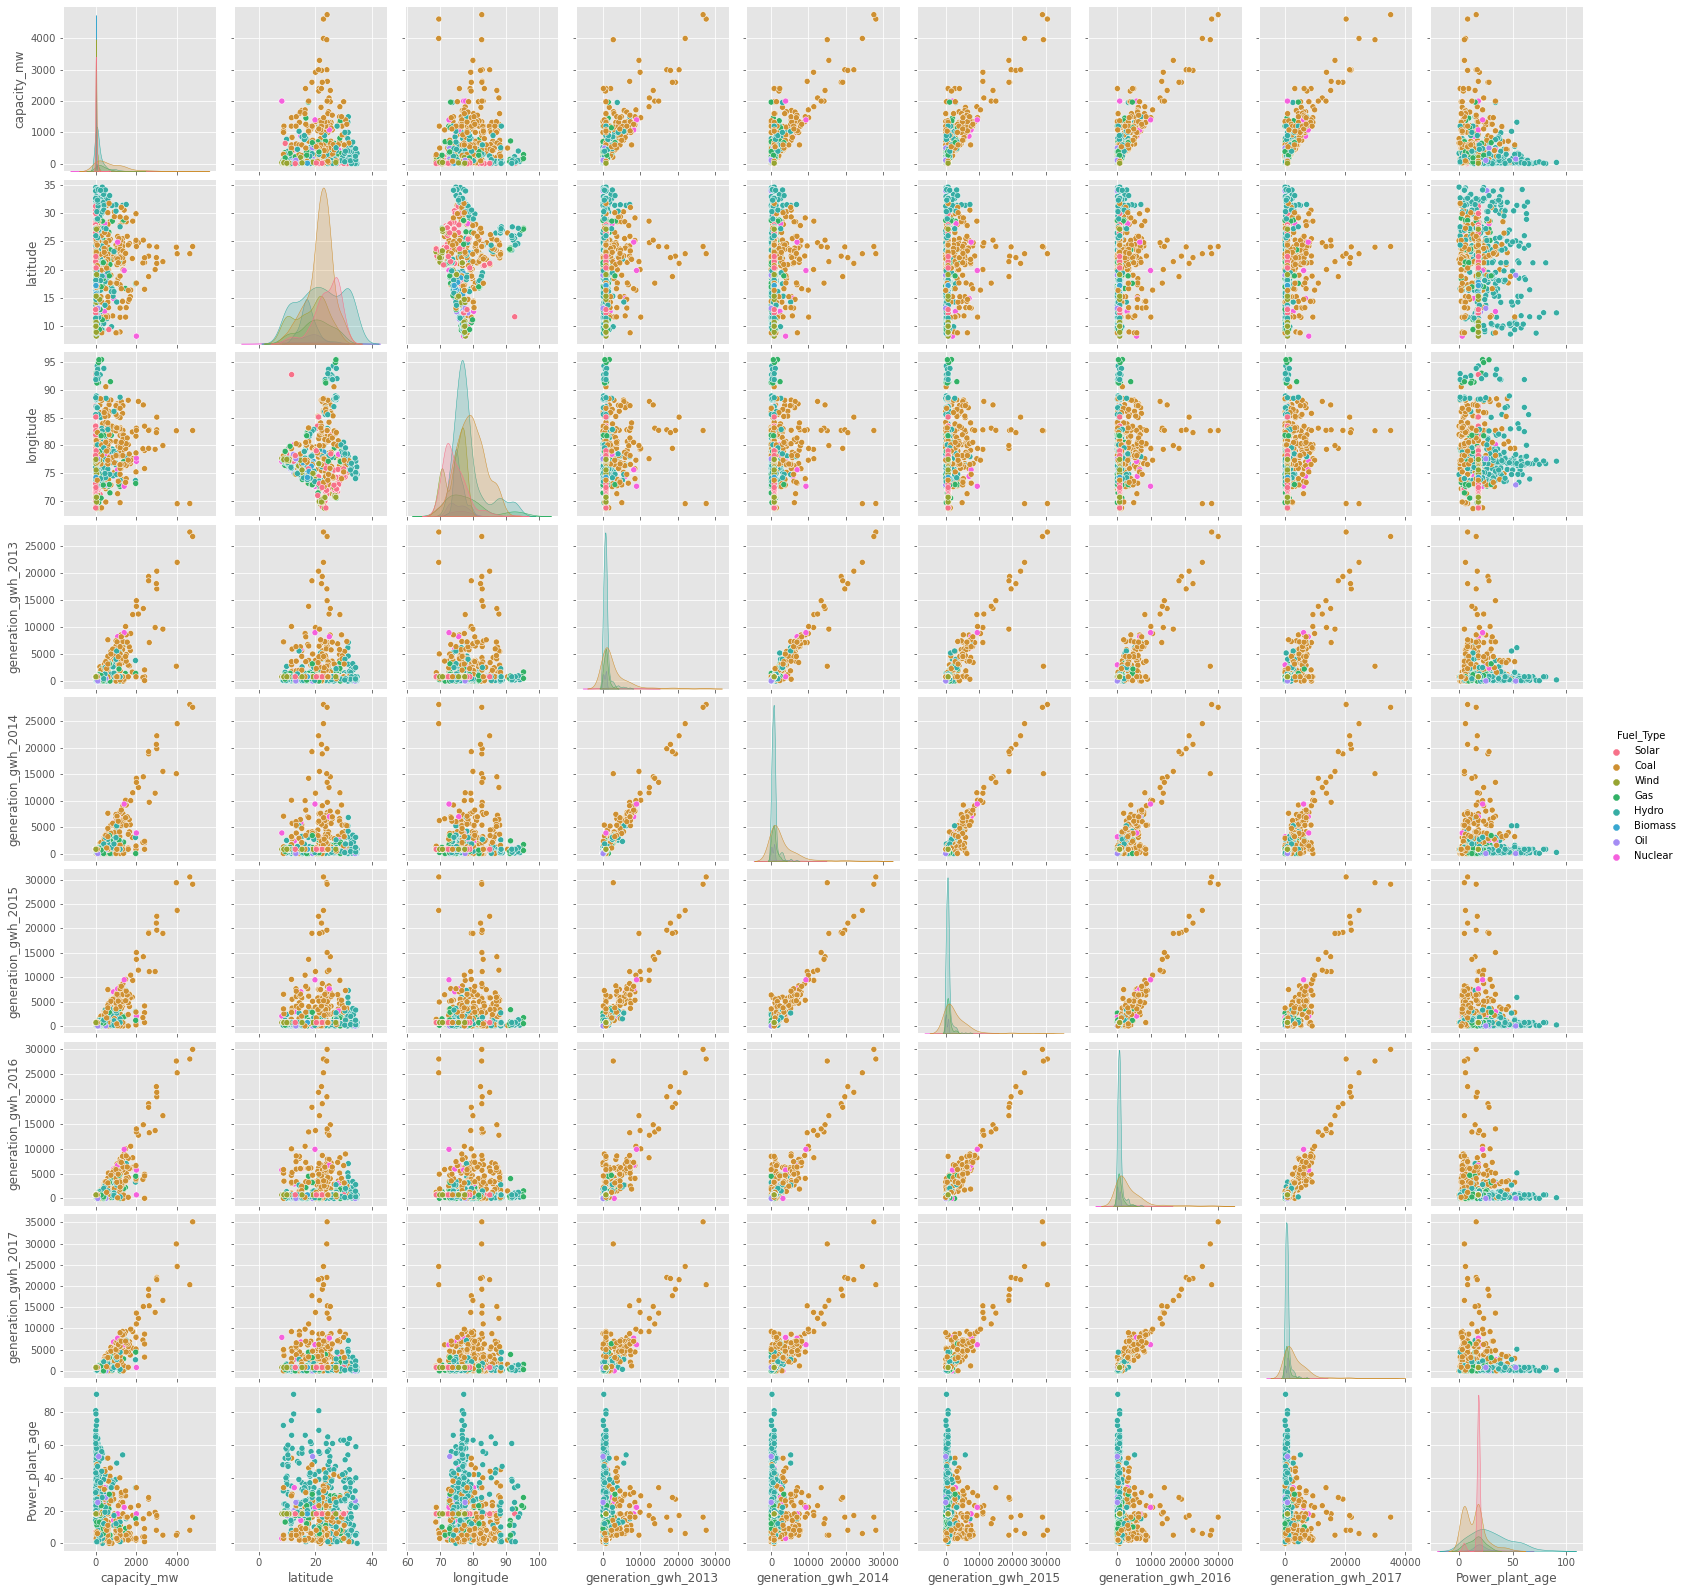

In [57]:
# checking the pairwise relation between the features and lavel Fuel_Type.
sns.pairplot(df,hue='Fuel_Type',palette='husl')

- This pair plot gives the pairwise relations of the features on the basis of target variable 'Fuel_Type' and we can notice most of the features are highly correlated with each other.
- Most of the columns have strong linear relationship also there are huge outliers present in the columns . So will remove these outliers in the later part.

# Outliers Handling

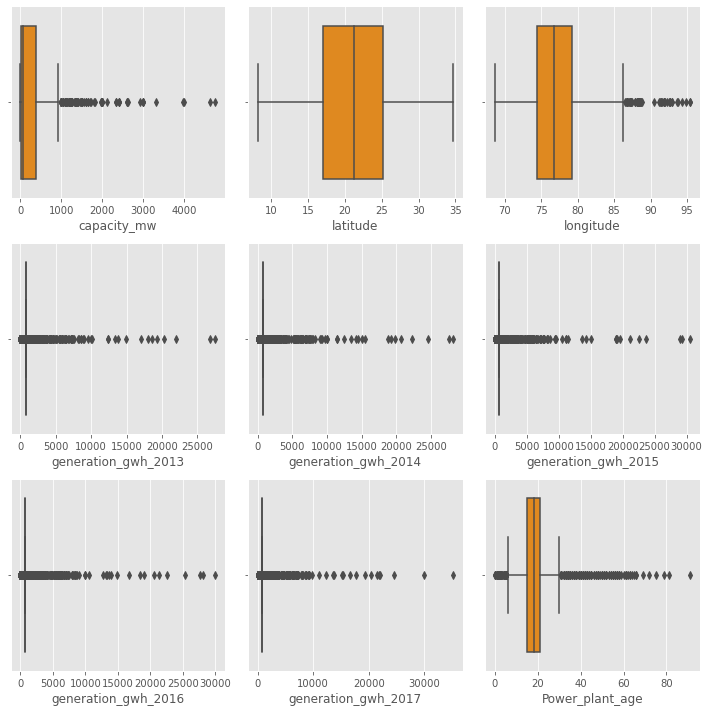

In [58]:
# indentifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

- In the boxplot we can notice the outliers present in all columns except latitude. Even target column has outliers but no need to remove it.
- Let's remove outliers using ZSCORE method.

# Removing Outliers

# ZSCORE method

In [59]:
# features containing outliers
features = df[['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']]

In [60]:
#using zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))
z

array([[0.87220856, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.97991772],
       [0.58602743, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [1.68109953, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       ...,
       [0.38271188, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [0.76616907, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [0.01377542, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747]])

- So here we have removed the outliers

In [61]:
# creating new dataframe

new_df= df[(z<3).all(axis=1)]
new_df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,797.063475,805.760000,701.027250,716.728350,807.601700,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,797.063475,805.760000,0.994875,233.596650,865.400000,2.0
904,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
905,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
906,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,18.0


- SO here we can see the new dataframe after removing the outliers. Here we have removed the outliers whose zscore is less than 3.

In [62]:
df.shape

(908, 13)

- Before removing outliers we had 908 rows and 13 columns in the dataset.

In [63]:
new_df.shape

(852, 13)

- After removing the outliers we have 852 rows and 13 columns

In [64]:
# checking the data loss
data_loss = (908-852)/908*100
data_loss

6.167400881057269

- Here We are losing only 6% of data by removing outliers using zscore.
Then remove the outliers and check data loss % by using IQR method.

# IQR METHOD(Inter Quantile Range)

In [65]:
Q1 = features.quantile(0.25)

Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

df1= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [66]:
df1.shape

(422, 13)

- So we can notice here that after using IQR method data have 422 rows and 13 columns

In [67]:
# let's check the dataloss
data_loss = (908-422)/908*100
data_loss

53.524229074889874

- We can observe here that using IQR method we are losing 53% of data which is huge. so considering zscore method for better result.

# Encoding the categorical columns using Label Encoding

In [68]:
categorical_col = ['Fuel_Type', 'other_fuel1','source','geolocation_source']

In [69]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(LE.fit_transform)

- SO here encoding the categorical columns using label encoder.

In [70]:
new_df[categorical_col]

,Fuel_Type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
903,1,2,22,2
904,6,2,77,0
905,7,2,21,2
906,1,2,59,2


- Now we have encoded the categorical columns using label encoding method.

# Correlation between the target variable and features using HEAT MAP

In [71]:
# checking the correlation between features and the target
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
capacity_mw,1.000000,0.047883,0.269970,-0.398618,-0.002132,-0.277952,0.236602,0.575972,0.627406,0.685477,0.761222,0.800618,-0.248690
latitude,0.047883,1.000000,-0.025155,-0.006130,0.036941,0.068515,-0.201910,0.074709,0.082205,0.071786,0.057760,0.070934,-0.084720
longitude,0.269970,-0.025155,1.000000,-0.388568,0.029138,-0.234616,0.264391,0.122737,0.126913,0.163771,0.207339,0.209047,-0.107977
Fuel_Type,-0.398618,-0.006130,-0.388568,1.000000,0.006390,0.039078,-0.478338,-0.232343,-0.250540,-0.277754,-0.290226,-0.291655,0.087476
other_fuel1,-0.002132,0.036941,0.029138,0.006390,1.000000,0.028433,-0.022798,0.001675,-0.000346,0.005892,0.015135,0.011855,-0.055179
source,-0.277952,0.068515,-0.234616,0.039078,0.028433,1.000000,-0.498012,-0.135116,-0.141641,-0.157690,-0.161786,-0.158162,-0.056455
geolocation_source,0.236602,-0.201910,0.264391,-0.478338,-0.022798,-0.498012,1.000000,0.108337,0.113568,0.126437,0.129721,0.126815,0.035803
generation_gwh_2013,0.575972,0.074709,0.122737,-0.232343,0.001675,-0.135116,0.108337,1.000000,0.944730,0.845955,0.730317,0.660801,-0.012797
generation_gwh_2014,0.627406,0.082205,0.126913,-0.250540,-0.000346,-0.141641,0.113568,0.944730,1.000000,0.911892,0.800808,0.742744,-0.069265
generation_gwh_2015,0.685477,0.071786,0.163771,-0.277754,0.005892,-0.157690,0.126437,0.845955,0.911892,1.000000,0.907462,0.826148,-0.141499


- This gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.

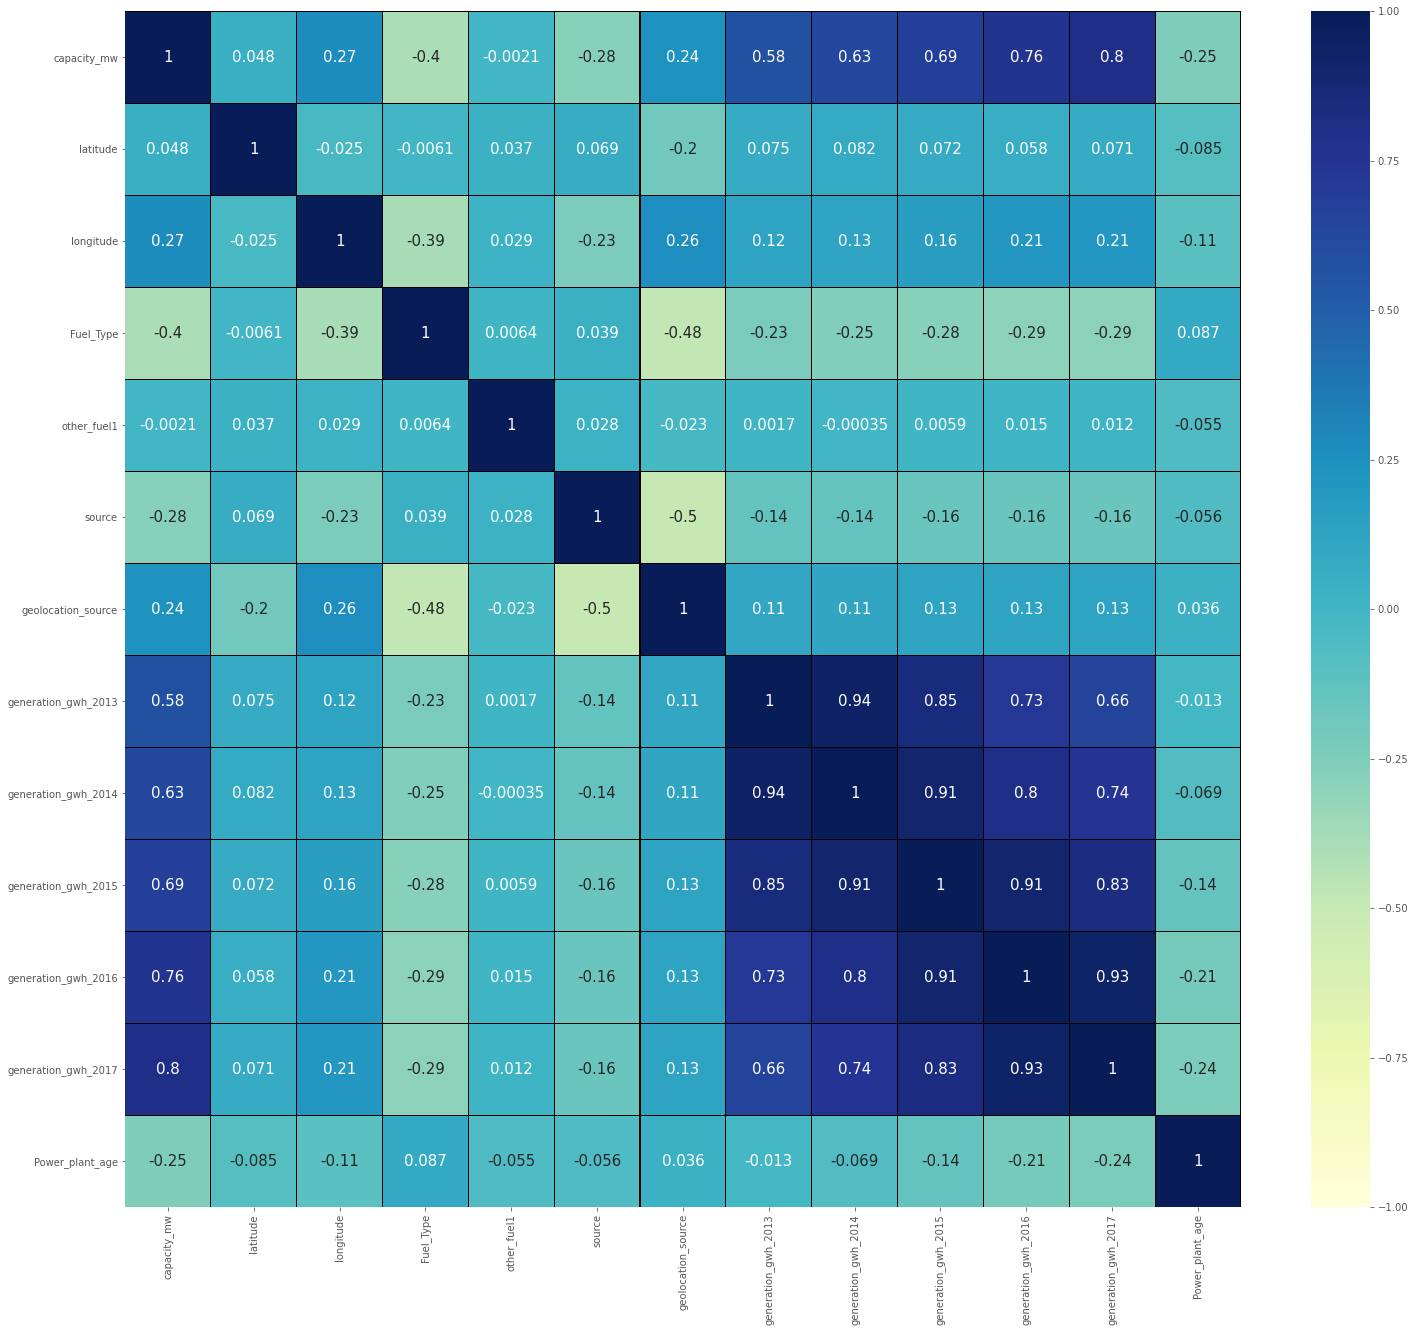

In [72]:
# visualizing the correlation matrix by plotting heat map

plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

This heatmap Shows the correlation matrix by visualizing  the data . 
- We can observe the relation between feature to feature and feature to label. 
- This heat map contains both positive and negative correlation.

Correlation between capacity_mw and features
- The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014 , generation_gwh_2013.
- & the label is negatively correlated with the features Fuel_Type, source and Power_plant_age.
- The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

Correlation between Fuel_Type and features
- The label Fuel_Type is less correlate with Power_plant_age and source
- The label is negatively correlated with geolocation_souce, longitude, capacity_mw and all generation_gwh years
- From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearty problem. So will try to solve this problem by Checking VIF value befor building our models.
- Also the features other_fuel1 and latitude have very less correlation with both the labels . Let's drop those columns.

# Visualizing the correlation between label and features using bar plot

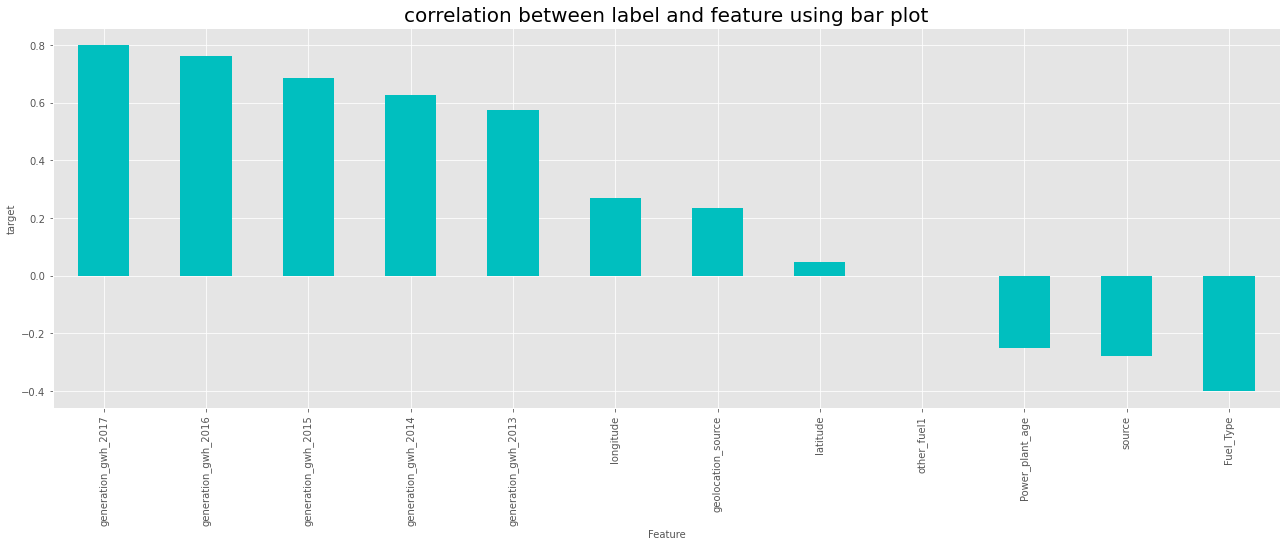

In [73]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

- This is the bar plot to check the correlation between capacity_mw and features . Here we can easily notice the positive and negative correlation between the features and the label.

# Visualizing the correlation between label and features using bar plot

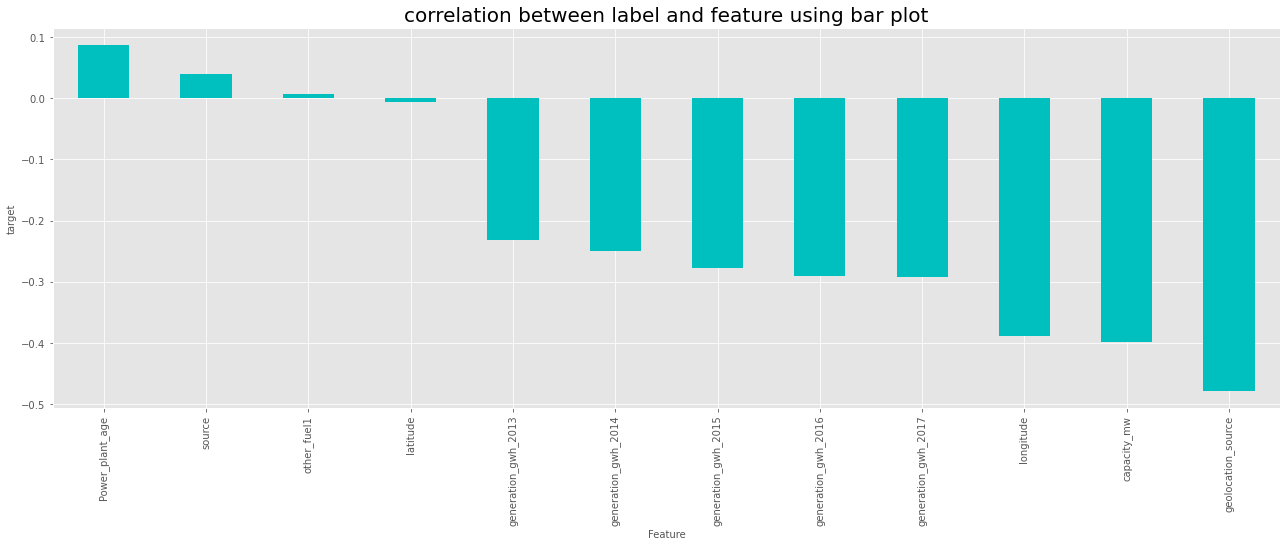

In [74]:
plt.figure(figsize=(22,7))
new_df.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

- This is the bar plot to check the correlation between Fuel_Type and features. Here we can easily notice the positive and negative correlation between the features and the label.

- From both the bar plots we can observe that the columns other_fuel1 and latitude have very less correlation with both the labels capacity_mw and Fuel_Type. 
Let's drop those columns.

In [75]:
# dropping irrelevant columns
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)

In [76]:
new_df.head()

,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.5,73.2407,6,109,1,797.063475,805.760000,701.02725,716.728350,807.601700,7.0
1,98.0,74.6090,1,174,2,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
2,39.2,69.3732,7,21,2,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
3,135.0,91.3602,2,22,2,631.777928,617.789264,843.74700,886.004428,663.774500,14.0
4,1800.0,82.4091,1,22,2,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,3.0


- SO here is the new data frame after removing unnecessary columns.

# 1. Prediction for capacity_mw

# Separating the features and label variables into x and y

In [77]:
x= new_df.drop('capacity_mw',axis=1)
y= new_df['capacity_mw']

In [78]:
x.shape

(852, 10)

In [79]:
y.shape

(852,)

- So here we can see the dimension of x and y

# Checking for SKEWNESS

In [80]:
x.skew()

longitude              0.888694
Fuel_Type              0.413982
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
Power_plant_age        1.209638
dtype: float64

The following columns have skewness more than +/-0.5

- longitude
- generation_gwh_2013
- generation_gwh_2014
- generation_gwh_2015
- generation_gwh_2016
- generation_gwh_2017
- Power_plant_age


- Also the columns - source and geolocation_source are categorical so no need to remove skewness in these columns.

# Removing skewness using yeo_johnson method

In [81]:
skew = ['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')


In [82]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.924039,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,-0.500630,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-2.373612,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,2.492970,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.285220,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274


In [83]:
# checking skewness after using yeo-johnson method
x.skew()

longitude              0.000077
Fuel_Type              0.413982
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125694
Power_plant_age        0.037747
dtype: float64

- SO here successfully removed the skewness from all the numerical columns using yeo-johnson method.
 

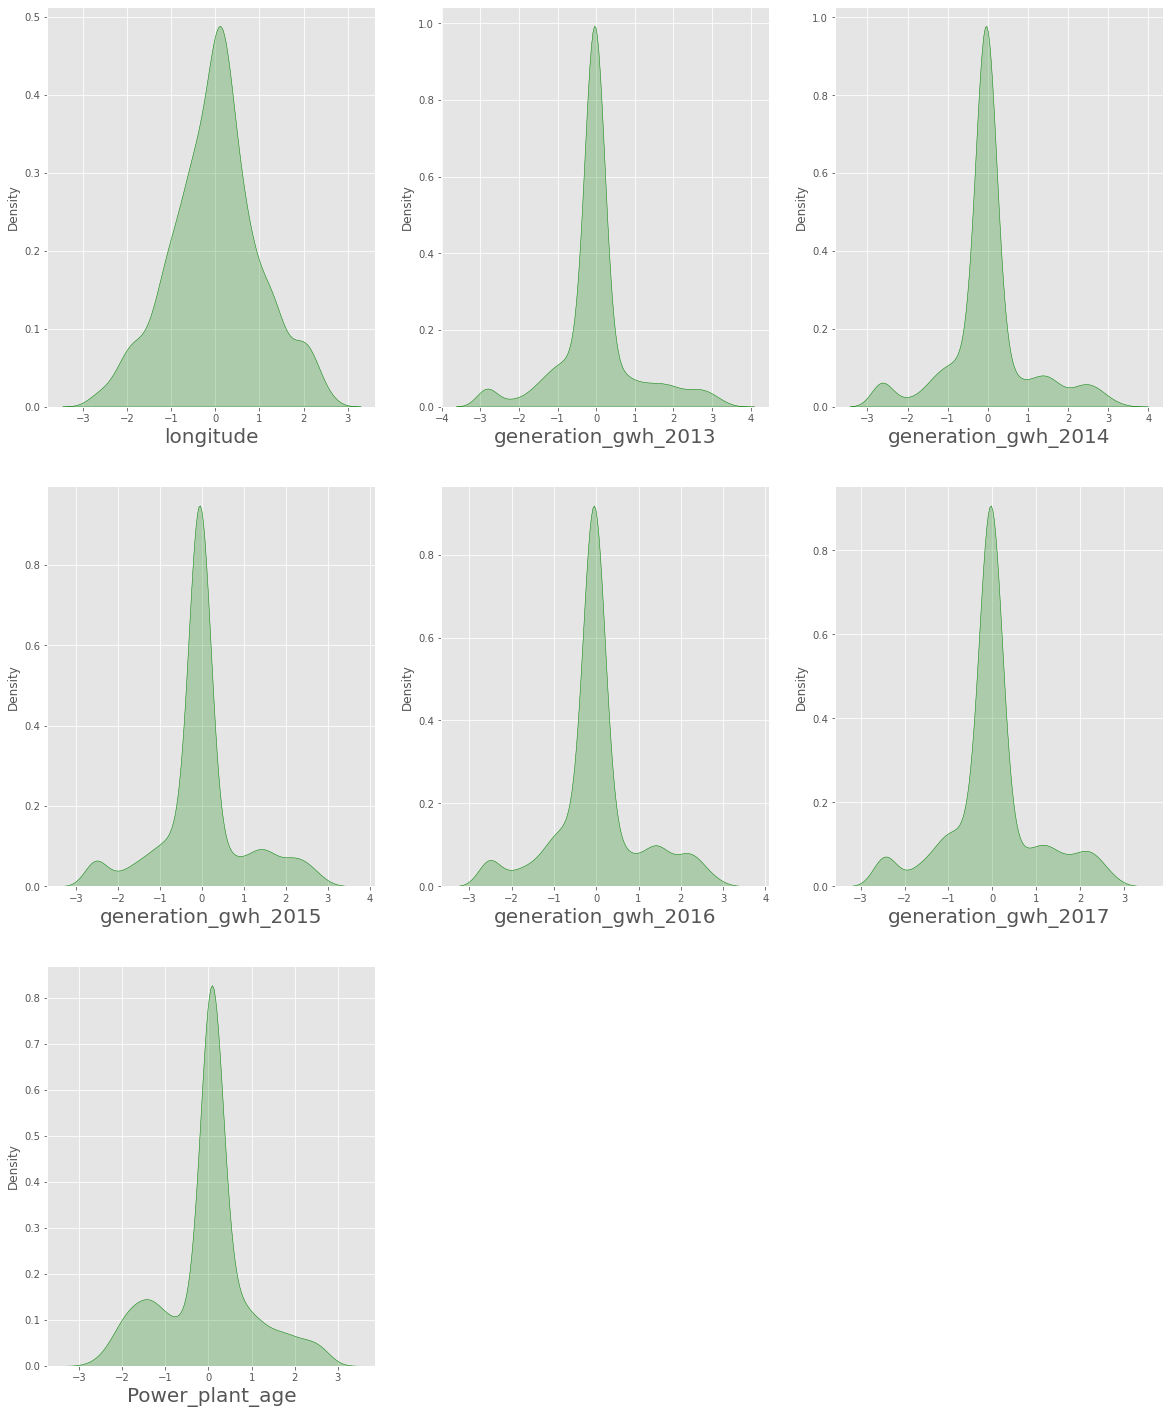

In [84]:
# checking how the data has been distributed in each columns.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={'shade': True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- The data is not normal but the skewness has been reduced in all the columns

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.924039,1.175664,1.399156,-1.037509,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,-0.500630,-0.973833,2.823623,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-2.373612,1.605563,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,2.492970,-0.543934,-0.507437,0.406866,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.285220,-0.973833,-0.507437,0.406866,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274
...,...,...,...,...,...,...,...,...,...,...
847,0.237064,-0.973833,-0.507437,0.406866,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.017970
848,0.429134,1.175664,0.697881,-2.481884,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
849,-0.223563,1.605563,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
850,-0.762359,-0.973833,0.303413,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356


- So here scaled the data using standard scalarization method to overcome with the issue of data biasness.

- As we have observed in the heat map there is multicolinearity issue exists in the data. So let's check the VIF value and if the columns have VIF > 10 then we can drop those columns.

# Checking VIF (Variance Inflation Factor ) Values

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]
vif['features'] = x.columns

# let's check the values
vif

,VIF values,features
0,1.313067,longitude
1,1.687238,Fuel_Type
2,1.502947,source
3,1.875104,geolocation_source
4,5.457906,generation_gwh_2013
5,7.210903,generation_gwh_2014
6,6.174992,generation_gwh_2015
7,9.656587,generation_gwh_2016
8,5.196305,generation_gwh_2017
9,1.127725,Power_plant_age


SO here we can observe all the columns have VIF less than 10 . 
- Which means we are free from multicolinearity problem .

- Let's move to building machine learning models.

In [87]:
# DataFrame after preprocessing and data cleaning
x.head()

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.924039,1.175664,1.399156,-1.037509,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,-0.500630,-0.973833,2.823623,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-2.373612,1.605563,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,2.492970,-0.543934,-0.507437,0.406866,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.285220,-0.973833,-0.507437,0.406866,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274


In the above cell we can see the dataframe after cleaning and preprocessing.
- Here We have done with the preprocessing and data cleaning .

-Now let's move to build the model.

# Modeling

Finding  best random state

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [89]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8488110002061511  on Random_state  85


- So here we are getting the maximum R2 Score as 85% on the Random State 85.

# Creating new train test split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Regression Algorithms

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Random Forest Regressor

In [92]:
# checking r2 score for random forest regressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y_test,predRFR))
print('MSE:',metrics.mean_squared_error(y_test,predRFR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predRFR)))

R2_Score: 0.8469934984457199
MAE: 88.89661884151027
MSE: 28295.432893708374
RNSE: 168.2124635504408


 - The R2 score value for Random Forest Regressor model is 85%

# Decision Tree Regressor

In [93]:
# checking r2 score for decision tree regressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',metrics.mean_absolute_error(y_test,predDTR))
print('MSE:',metrics.mean_squared_error(y_test,predDTR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predDTR)))

R2_Score: 0.745389731889226
MAE: 111.25848325892858
MSE: 47084.977972793684
RNSE: 216.99073245830957


- So here the r2 score for Decision Tree Regressor is 73%

# KNeighbors Regressor

In [94]:
# checking r2 score for Kneighbors regressor
knn = KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test,predknn))
print('MSE:',metrics.mean_squared_error(y_test,predknn))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predknn)))

R2_Score: 0.8312159885088886
MAE: 88.30675000000001
MSE: 31213.161677207503
RNSE: 176.67247006029973


- So here r2 score for KNN is 83%

# Gradient Boosting Regressor

In [95]:
# checking r2 score for gradient boosting regressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test,predGB))
print('MSE:',metrics.mean_squared_error(y_test,predGB))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predGB)))

R2_Score: 0.8357540741191107
MAE: 93.21116437234127
MSE: 30373.935268227797
RNSE: 174.28119596854904


- So here r2 score for Gradient Boosting Regressor is 83%

# Bagging Regressor

In [96]:
# checking r2 score for bagging regressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',metrics.mean_absolute_error(y_test,predBR))
print('MSE:',metrics.mean_squared_error(y_test,predBR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predBR)))

R2_Score: 0.8208958165668702
MAE: 97.1067314958539
MSE: 33121.66706534829
RNSE: 181.9935907260151


- So here r2 score for Bagging Regressor is 85%

# Checking the cross validation score

In [97]:
# checking cv score for Random Forest Regressor
print(cross_val_score(RFR,x,y,cv=5).mean())

0.7758135182743019


In [98]:
# checking cv score for Decision Tree Regressor
print(cross_val_score(DTR,x,y,cv=5).mean())

0.5883860584518581


In [99]:
# checking cv score for KNN Regressor
print(cross_val_score(knn,x,y,cv=5).mean())

0.7417542415978613


In [100]:
# checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean())

0.7619778314722636


In [101]:
# checking cv score for Bagging Regressor
print(cross_val_score(BR,x,y,cv=5).mean())

0.7546317897717503


- From the above observation  the difference between R2 score and the Cross Validation score we conclude that Random Forest Regressor as our best model.

Let's increase the accuracy of the model by using Hyper Parameter Tuning.

# Hyper Parameter Tuning

In [102]:
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [103]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [104]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [105]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

- So these are the best parameters value of RandomForestRegressor.

In [106]:
capacity = RandomForestRegressor(criterion='mse',max_depth=6, max_features='log2', n_estimators=200)
capacity.fit(x_train,y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 168.2124635504408
R2_Score: 84.802711604527


 - After tuning the model the R2 Score is increased by 1% and we are getting R2 Score as 85% for Random Forest Regressor. which is good.

# Saving the Model

In [107]:
import joblib
joblib.dump(capacity,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

- And here we have saved the best model using joblib.

# 2. Prediction for Fuel_Type

# Separating the features and label variables into x_df and y_df

In [108]:
x_df = new_df.drop("Fuel_Type", axis=1)
y_df = new_df["Fuel_Type"]

In [109]:
x_df.shape

(852, 10)

In [110]:
y_df.shape

(852,)

- Here is the dimension of x and y

# Checking for Skewness

In [111]:
x_df.skew()

capacity_mw            2.134177
longitude              0.888694
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
Power_plant_age        1.209638
dtype: float64

- We can observe the skewness in al the columns but the columns source and geolocation_source are categorical so no need to remove skewness in these coluns

# Removing Skewness using yeo-johnson method

In [112]:
skew = ['capacity_mw','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [113]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.675434,-0.924039,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,0.214717,-0.500630,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-0.280583,-2.373612,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,0.386767,2.492970,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.740344,1.285220,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274


In [114]:
# checking skewness after using yeo-johnson method
x_df.skew()

capacity_mw            0.013903
longitude              0.000077
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125694
Power_plant_age        0.037747
dtype: float64

- Now we have removed the skewness in all the numerical columns

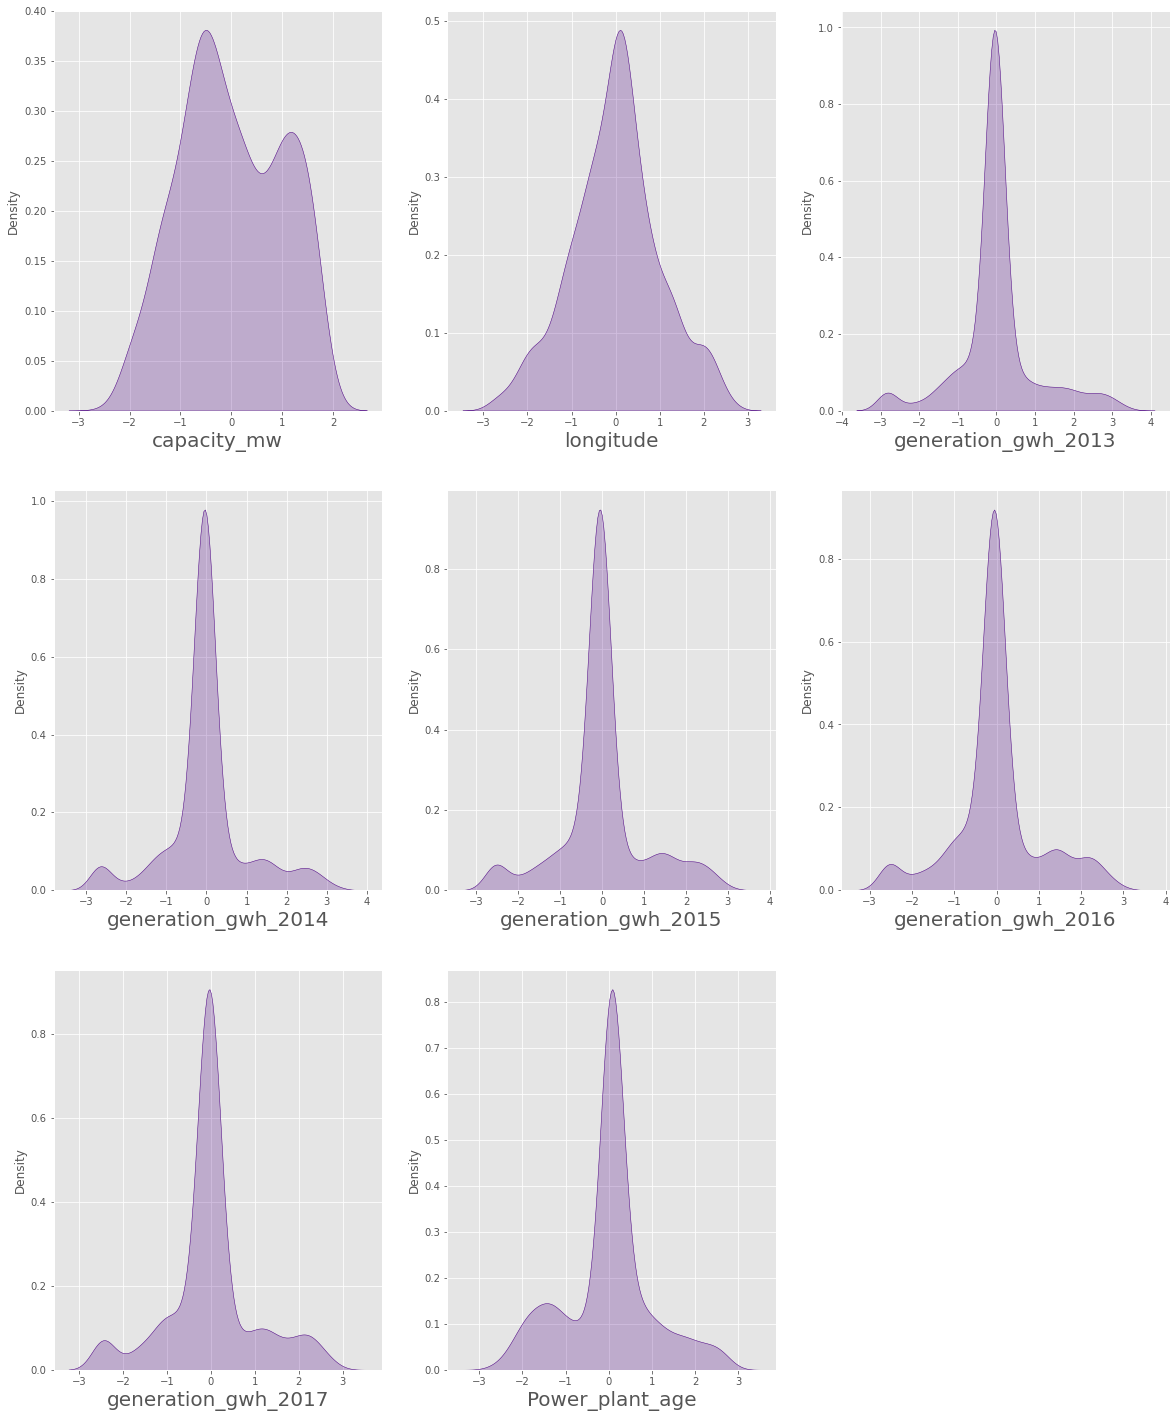

In [115]:
# let's check how the data has been distributed in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- The data is not normal but we can notice the skewness has been removed.

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df), columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.675434,-0.924039,1.399156,-1.037509,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,0.214717,-0.500630,2.823623,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-0.280583,-2.373612,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,0.386767,2.492970,-0.507437,0.406866,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.740344,1.285220,-0.507437,0.406866,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274
...,...,...,...,...,...,...,...,...,...,...
847,1.680420,0.237064,-0.507437,0.406866,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.017970
848,-1.597071,0.429134,0.697881,-2.481884,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
849,-0.513131,-0.223563,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
850,0.105331,-0.762359,0.303413,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356


- So here we have scaled the dat using Standard Scalarization method to overcome with the issue of data biasness.

- As we have observed in the heat map there is multicolinearity issue exists in the data, so let's check the VIF value and if the columns have VIF > 10 then we can drop those columns.

# Checking VIF values

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns
vif

,VIF values,Features
0,1.827367,capacity_mw
1,1.199592,longitude
2,1.412236,source
3,1.588651,geolocation_source
4,5.468598,generation_gwh_2013
5,7.212366,generation_gwh_2014
6,6.182418,generation_gwh_2015
7,9.655331,generation_gwh_2016
8,5.231173,generation_gwh_2017
9,1.182482,Power_plant_age


- The VIF value is less than 10 in all the columns which means we are free from multicolinearity problem.

In [118]:
y_df.value_counts()

1    240
3    218
6    126
7    123
2     65
0     50
5     21
4      9
Name: Fuel_Type, dtype: int64

- Here we can observe that the target variable Fuel_Type has multi classes means it is a multiclassification problem .
- Also the data is not balanced so we will use oversampling method to balance the data.

# Oversampling

In [119]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_df, y_df = SM.fit_resample(x_df,y_df)

In [120]:
y_df.value_counts()

7    240
6    240
5    240
4    240
3    240
2    240
1    240
0    240
Name: Fuel_Type, dtype: int64

- Since the highest count of the target is 240 so the data is balanced by oversampling all the classes to the count 240

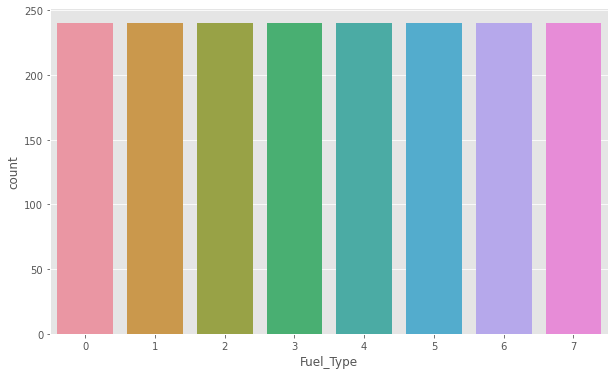

In [121]:
# visualize the data after balancing
plt.figure(figsize=(10,6))
sns.countplot(y_df)
plt.show()

- Here we can clearly visualize the dat in all the types are equal.

In [122]:
x_df.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.675434,-0.924039,1.399156,-1.037509,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,0.214717,-0.500630,2.823623,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-0.280583,-2.373612,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,0.386767,2.492970,-0.507437,0.406866,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.740344,1.285220,-0.507437,0.406866,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274


- This is the dataframe after preprocessing  and cleaning the data

# Modeling

# Finding the best random state

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
macRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.30,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_df_train,y_df_train)
    pred = DTC.predict(x_df_test)
    acc=accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8940972222222222  on Random_state  57


# Creating train_test_split

In [124]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size=.30,random_state=maxRS)

- We have created a new train test split using Random State

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [126]:
# checking accuracy for decision tree classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)

# prediction
predDTC = DTC.predict(x_df_test)

print(accuracy_score(y_df_test, predDTC))
print(confusion_matrix(y_df_test, predDTC))
print(classification_report(y_df_test, predDTC))

0.8923611111111112
[[78  3  0  0  0  0  0  0]
 [ 3 37  6  5  2  3  0  0]
 [ 1  4 61  7  1  3  0  1]
 [ 0  3  4 58  2  2  0  0]
 [ 0  3  0  1 66  0  0  0]
 [ 1  3  3  0  0 71  0  0]
 [ 0  0  1  0  0  0 65  0]
 [ 0  0  0  0  0  0  0 78]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        81
           1       0.70      0.66      0.68        56
           2       0.81      0.78      0.80        78
           3       0.82      0.84      0.83        69
           4       0.93      0.94      0.94        70
           5       0.90      0.91      0.90        78
           6       1.00      0.98      0.99        66
           7       0.99      1.00      0.99        78

    accuracy                           0.89       576
   macro avg       0.89      0.89      0.89       576
weighted avg       0.89      0.89      0.89       576



- So here we are getting 88% accuracy using DTC

We can also observe th confusion matrx which contains True-Positive, False-Positive rate and False-Negative, True-Negative rate.

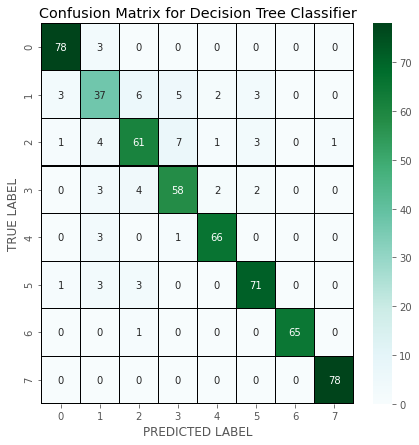

In [127]:
# let's plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,predDTC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

# Random Forest Classifier

In [128]:
RFC = RandomForestClassifier()
RFC.fit(x_df_train,y_df_train)

# prediction
predRFC = RFC.predict(x_df_test)

print(accuracy_score(y_df_test, predRFC))
print(confusion_matrix(y_df_test, predRFC))
print(classification_report(y_df_test, predRFC))

0.9253472222222222
[[80  0  0  0  0  1  0  0]
 [ 4 42  4  3  2  1  0  0]
 [ 1  0 65  5  1  5  0  1]
 [ 0  4  4 59  0  2  0  0]
 [ 0  1  0  0 69  0  0  0]
 [ 1  3  0  0  0 74  0  0]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0 78]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        81
           1       0.84      0.75      0.79        56
           2       0.89      0.83      0.86        78
           3       0.88      0.86      0.87        69
           4       0.96      0.99      0.97        70
           5       0.89      0.95      0.92        78
           6       1.00      1.00      1.00        66
           7       0.99      1.00      0.99        78

    accuracy                           0.93       576
   macro avg       0.92      0.92      0.92       576
weighted avg       0.92      0.93      0.92       576



- The Random Forest Classifier has accuracy 91%

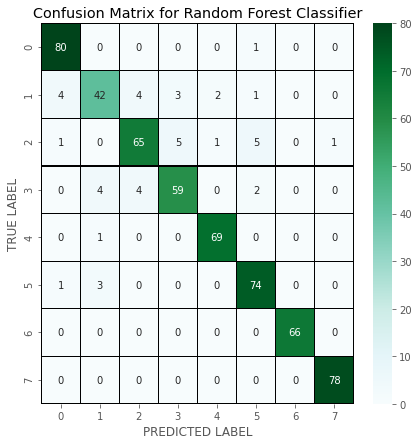

In [129]:
# let's plot confusion matrix for RFC
cm = confusion_matrix(y_df_test,predRFC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

# Support Vector Classifier

In [130]:
svc = SVC()
svc.fit(x_df_train,y_df_train)

# prediction
predsvc = svc.predict(x_df_test)

print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test, predsvc))

0.8038194444444444
[[69  0  0  0  0  1  0 11]
 [ 9 28  5  4  5  0  0  5]
 [ 2  4 45  4  3 17  0  3]
 [ 0  7  8 40  1  2  0 11]
 [ 0  1  0  2 67  0  0  0]
 [ 2  2  0  0  0 70  0  4]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0 78]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        81
           1       0.67      0.50      0.57        56
           2       0.78      0.58      0.66        78
           3       0.80      0.58      0.67        69
           4       0.88      0.96      0.92        70
           5       0.78      0.90      0.83        78
           6       1.00      1.00      1.00        66
           7       0.70      1.00      0.82        78

    accuracy                           0.80       576
   macro avg       0.80      0.80      0.79       576
weighted avg       0.81      0.80      0.79       576



- The accuracy usin SVC is 80%

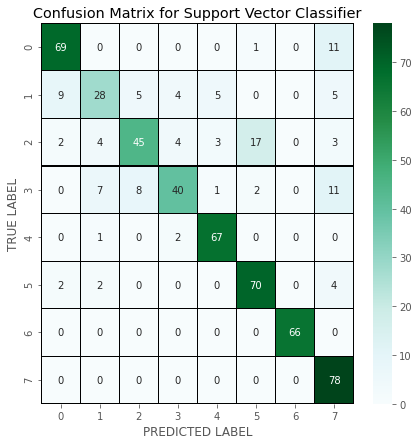

In [131]:
# let's plot confusion matrix for SVC
cm = confusion_matrix(y_df_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Support Vector Classifier")
plt.show()

# KNeighbors Classifier

In [132]:
knn = KNN()
knn.fit(x_df_train,y_df_train)

# prediction
predknn = knn.predict(x_df_test)

print(accuracy_score(y_df_test, predknn))
print(confusion_matrix(y_df_test, predknn))
print(classification_report(y_df_test, predknn))

0.8576388888888888
[[75  2  0  0  0  1  0  3]
 [10 27  8  3  6  0  0  2]
 [ 1  3 61  5  2  5  0  1]
 [ 0  5  7 51  1  2  0  3]
 [ 0  1  2  0 67  0  0  0]
 [ 3  2  2  0  0 70  0  1]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  0  1  0  0  0 77]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        81
           1       0.68      0.48      0.56        56
           2       0.76      0.78      0.77        78
           3       0.85      0.74      0.79        69
           4       0.88      0.96      0.92        70
           5       0.90      0.90      0.90        78
           6       1.00      1.00      1.00        66
           7       0.89      0.99      0.93        78

    accuracy                           0.86       576
   macro avg       0.85      0.85      0.84       576
weighted avg       0.85      0.86      0.85       576



- The accuracy using KNN is 85%

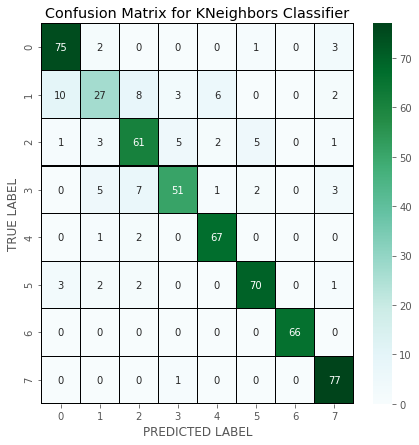

In [133]:
# let's plot confusion matrix for KNN
cm = confusion_matrix(y_df_test,predknn)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for KNeighbors Classifier")
plt.show()

# Gradient Boosting Classifier

In [134]:
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)

# prediction
predGB = GB.predict(x_df_test)

print(accuracy_score(y_df_test, predGB))
print(confusion_matrix(y_df_test, predGB))
print(classification_report(y_df_test, predGB))

0.9114583333333334
[[78  2  0  0  0  1  0  0]
 [ 5 43  4  2  2  0  0  0]
 [ 0  4 64  4  0  5  0  1]
 [ 0  4  6 57  0  2  0  0]
 [ 0  0  0  2 68  0  0  0]
 [ 2  4  0  0  0 72  0  0]
 [ 0  0  1  0  0  0 65  0]
 [ 0  0  0  0  0  0  0 78]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        81
           1       0.75      0.77      0.76        56
           2       0.85      0.82      0.84        78
           3       0.88      0.83      0.85        69
           4       0.97      0.97      0.97        70
           5       0.90      0.92      0.91        78
           6       1.00      0.98      0.99        66
           7       0.99      1.00      0.99        78

    accuracy                           0.91       576
   macro avg       0.91      0.91      0.91       576
weighted avg       0.91      0.91      0.91       576



- So the accuracy using Gb is 89%

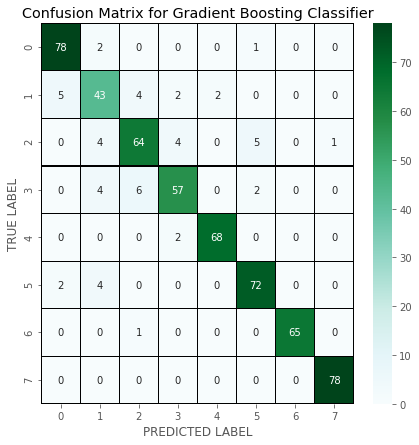

In [135]:
# let's plot confusion matrix for GB
cm = confusion_matrix(y_df_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

# Bagging Classifier

In [136]:
BC = BaggingClassifier()
BC.fit(x_df_train,y_df_train)

# prediction
predBC = BC.predict(x_df_test)

print(accuracy_score(y_df_test, predBC))
print(confusion_matrix(y_df_test, predBC))
print(classification_report(y_df_test, predBC))

0.9201388888888888
[[80  0  0  0  0  1  0  0]
 [ 1 44  4  4  2  1  0  0]
 [ 1  4 68  1  0  3  0  1]
 [ 0  6  5 56  0  2  0  0]
 [ 0  2  0  1 67  0  0  0]
 [ 1  3  2  0  0 72  0  0]
 [ 0  0  1  0  0  0 65  0]
 [ 0  0  0  0  0  0  0 78]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98        81
           1       0.75      0.79      0.77        56
           2       0.85      0.87      0.86        78
           3       0.90      0.81      0.85        69
           4       0.97      0.96      0.96        70
           5       0.91      0.92      0.92        78
           6       1.00      0.98      0.99        66
           7       0.99      1.00      0.99        78

    accuracy                           0.92       576
   macro avg       0.92      0.92      0.92       576
weighted avg       0.92      0.92      0.92       576



- So the accuracy using BC is 90%

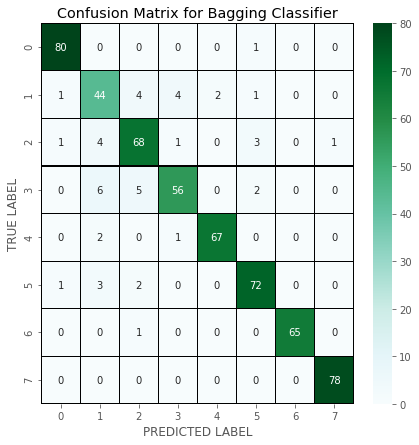

In [137]:
# let's plot confusion matrix for BC
cm = confusion_matrix(y_df_test,predBC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Bagging Classifier")
plt.show()

# Checking the Cross Validation Score

In [138]:
from sklearn.model_selection import cross_val_score

In [139]:
# cv scor for Decision Tree Classifier
print(cross_val_score(DTC ,x_df,y_df,cv=5).mean())

0.8630208333333333


In [140]:
# cv scor for Random Forest Classifier
print(cross_val_score(RFC ,x_df,y_df,cv=5).mean())

0.9192708333333333


In [141]:
# cv scor for Support Vector Classifier
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

0.79375


In [142]:
# cv scor for KNeighbors Classifier
print(cross_val_score(knn ,x_df,y_df,cv=5).mean())

0.8567708333333333


In [143]:
# cv scor for Gradient Boosting Classifier
print(cross_val_score(GB ,x_df,y_df,cv=5).mean())

0.9005208333333334


In [144]:
# cv scor for Bagging Classifier
print(cross_val_score(BC ,x_df,y_df,cv=5).mean())

0.896875


- Above are the cross validation score for all the models used.

The difference between accuracy score and cross validation score of Gradient Boosting Classifier is very less compared to other models .
- So we can conclude that Gradient Boosting Classifier as our best fitting model.

# Hyper Parameter Tuning

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
# Gradient Boosting Classifier
parameters ={'criterion':['friedman_mse','mse','mae'],
            'max_features':['auto','sqrt','log2'],
            'n_estimators':[0,200],
            'max_depth':[2,3,4,5,6,8]}

In [150]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [ ]:
GCV.fit(x_df_train,y_df_train)

In [ ]:
GCV.best_params_

- These are the best parameter values

In [ ]:
fuel_type =GradientBoostingClassifier (criterion='friedman_mse', max_depth=8, max_features='log2', n_estimators=200)
fuel_type.fit(x_df_train,y_df_train)
pred = fuel_type.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

- So here we can see the accuracy of the best model is increased after tuning which is good. 

# Plotting ROC and compare AUC for the final model

Since our target variable has multiclassification problem so will use label binarize to convert multi classes into binary classes.

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

classifier = OneVsRestClassifier(fuel_type)
y_score = classifier.fit(x_df_train,y_df_train).predict_proba(x_df_test)

# Binarize the output
y_df_test_bin = label_binarize(y_df_test, classes[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i],_=roc_curve(y_df_test_bin[:,i],y_score[:,i])
    roc_auc[i] = auc(false_positive_rate[i],true_positive_rate[i])
    
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))

plt.plot([0,1],[0,1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc='lower right')
plt.show()

- This is the AUC-ROC curve for th final model and is plotted False positive rate against True positive rate. 

Here we can observe the area of all the fuel types.

# Saving the Model

In [ ]:
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_Fuel_Type.pkl")

- We have saved the final model using joblib.

# Conclusion :- 
    
    - The final R2 score for the prediction of capacity_mw of the power plant using Regression algorithm is = 85%
    - The final Accuracy  for the prediction of Fuel_Type of the power plant using Classification algorithm is = 91%
